In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from src.experiment_utils import run_real_data_experiments

In [3]:
# for experiments varying max_features argument
features = [1., .8, .6, .4, .2]

# for experiments varying max_leaf_nodes argument
depths = [500, 200, 100, 50]

In [4]:
n_seeds = 3 # Note: experiments in the paper used n_seeds=10 (i.e. 10 repetitions of each setting);
            # here we set the argument lower to speed up run time for convenience

In [5]:
# datasets used in paper
classification_ids = [45028, 45019] # california, bioresponse
regression_ids = [44147 ,44148] # miami housing, superconduct

In [6]:
# choose a dataset
dataset_id = 44147
classification = dataset_id in classification_ids

# Replicating experiments from Section 3 with real data

In [7]:
# experiment varying max_features
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features]
res = run_real_data_experiments(file_name='features_real', configs=configs, dataset_id=dataset_id, classification=classification, n_seeds=n_seeds)

Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 0.8 and max_leaf_nodes 500.
Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 0.6 and max_leaf_nodes 500.
Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 0.4 and max_leaf_nodes 500.
Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 0.2 and max_leaf_nodes 500.
Running experiment with seed 2 version 0, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 2 version 0, bootstrap False, n_estimators 50, max_features 0.8 and max_leaf_nodes 500.
Running experiment with seed 2 version 0, bootstrap False, n_estimators 50, max_features 0.6 and max_leaf_nodes 500.
Running experiment with seed 2 version 0, bootstrap False, n_est

Text(0.5, 1.0, 'MSE Test')

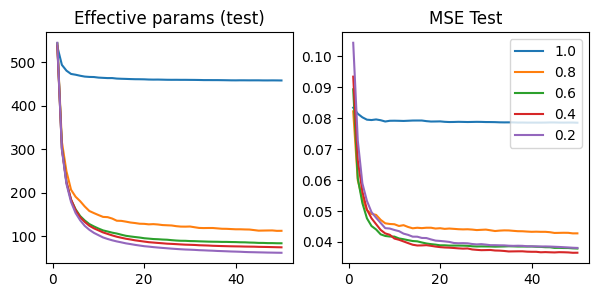

In [8]:
res_mean = res.groupby(['max_features', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{f}')
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{f}')
plt.legend()
plt.title('MSE Test')

In [9]:
# run experiment varying max depth
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':x, 'max_features': 1/3} for x in depths]
res = run_real_data_experiments(file_name='depths_real', configs=configs, dataset_id=dataset_id, classification=classification, n_seeds=n_seeds)

Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 0.3333333333333333 and max_leaf_nodes 500.


Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 0.3333333333333333 and max_leaf_nodes 200.
Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 0.3333333333333333 and max_leaf_nodes 100.
Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 0.3333333333333333 and max_leaf_nodes 50.
Running experiment with seed 2 version 0, bootstrap False, n_estimators 50, max_features 0.3333333333333333 and max_leaf_nodes 500.
Running experiment with seed 2 version 0, bootstrap False, n_estimators 50, max_features 0.3333333333333333 and max_leaf_nodes 200.
Running experiment with seed 2 version 0, bootstrap False, n_estimators 50, max_features 0.3333333333333333 and max_leaf_nodes 100.
Running experiment with seed 2 version 0, bootstrap False, n_estimators 50, max_features 0.3333333333333333 and max_leaf_nodes 50.
Running experiment with seed 3 version 0, bootstrap False, n_estimators 50, ma

Text(0.5, 1.0, 'MSE Test')

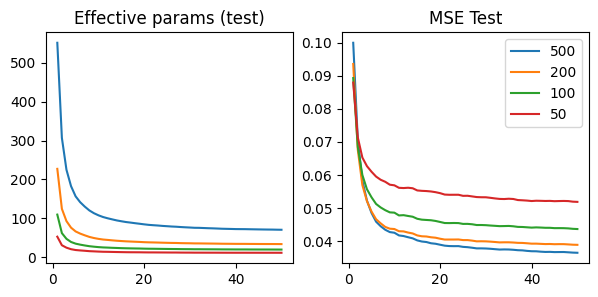

In [10]:
res_mean = res.groupby(['max_leaf_nodes', 'n_estimators'])[['mse_test', 'ep_train', 'ep_test']].mean().reset_index()

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['ep_test'], label=f'{d}')
plt.title('Effective params (test)')

plt.subplot(1, 2, 2)
for d in depths:
    res_sel = res_mean[res_mean['max_leaf_nodes']==d]
    plt.plot(res_sel['n_estimators'], res_sel['mse_test'], label=f'{d}')
plt.legend()
plt.title('MSE Test')

# Replicating experiments from Section 4 with real data

In [11]:
# run error decomposition experiment instead
configs=[{'bootstrap': False, 'n_estimators': 50, 'max_leaf_nodes':500, 'max_features': x} for x in features]

# note: n_reps in the paper is 50, here we set it lower for convenience
res = run_real_data_experiments(file_name='decomp_real', configs=configs, dataset_id=dataset_id, classification=classification, n_seeds=n_seeds, n_reps=10, 
                                decomp_experiment=True)

Running experiment with seed 1 version 0, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 1, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 2, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 3, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 4, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 5, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 6, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 7, bootstrap False, n_estimators 50, max_features 1.0 and max_leaf_nodes 500.
Running experiment with seed 1 version 8, bootstrap False, n_est

Text(0.5, 1.0, 'ModVar')

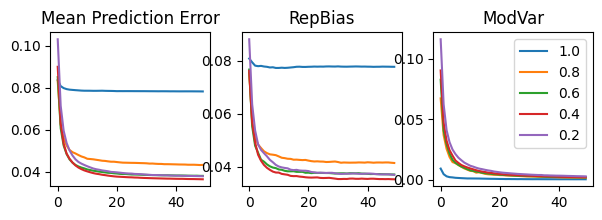

In [12]:
res_mean = res.groupby(['max_features', 'n_estimators'])[[ 'avg_mse', 'repbias', 'modvar']].mean().reset_index()

plt.figure(figsize=(7, 2))
plt.subplot(1, 3, 1)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['avg_mse'], label=f'{f}')
plt.title('Mean Prediction Error')

plt.subplot(1, 3, 2)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['repbias'], label=f'{f}')
plt.title('RepBias')

plt.subplot(1, 3, 3)
for f in features:
    res_sel = res_mean[res_mean['max_features']==f]
    plt.plot(res_sel['n_estimators'], res_sel['modvar'], label=f'{f}')
plt.legend()
plt.title('ModVar')